* Guy Kabiri (גיא כבירי)
* https://www.kaggle.com/guykabiri

# Exercise 1

## Intro
In this competition I will investigate the data of passengers who boarded the Titanic.  
I will try to study the connection between the different features in this data in order to create a model which will be able to predict whether a passenger survived or not.  
I will use two types of models with different features to find the best model for this data.
* SGD - a GD-like linear regression algorithm.
* MLP - an artificial nueral network.

## Imports

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network

## Import The Data

In [ ]:
!wget https://gist.githubusercontent.com/GuyKabiri/a1a233f9611b42d73fbe9a80d0dbbdc5/raw/7e028ef479b21260c36d081c4a4c659272d81518/titanic_train.csv
!wget https://gist.githubusercontent.com/GuyKabiri/d68c5b33a6954b89c19e371387dd45ac/raw/849c6d65c7fe4ac329dd8e137a33dcd928590d20/titanic_test.csv

--2021-01-02 15:34:57--  https://gist.githubusercontent.com/GuyKabiri/a1a233f9611b42d73fbe9a80d0dbbdc5/raw/7e028ef479b21260c36d081c4a4c659272d81518/titanic_train.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic_train.csv.6’

titanic_train.csv.6 100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2021-01-02 15:34:57 (4.42 MB/s) - ‘titanic_train.csv.6’ saved [60302/60302]

--2021-01-02 15:34:57--  https://gist.githubusercontent.com/GuyKabiri/d68c5b33a6954b89c19e371387dd45ac/raw/849c6d65c7fe4ac329dd8e137a33dcd928590d20/titanic_test.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githu

In [ ]:
train_csv = pd.read_csv('titanic_train.csv')
titanic_df = pd.DataFrame(train_csv)
test_csv = pd.read_csv('titanic_test.csv')
test = pd.DataFrame(test_csv)

## Explore The Data

First of all, let's see the keys.

In [ ]:
display(titanic_df.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Understanding the keys meaning:
* `PassengareId` - Id of the passenger .
* `Survived` - Whether the passenger survives or not.
* `Pclass` - The ticket class (SES)
* `Name` - Name of the passenger.
* `Sex` - Gender of the passenger.
* `Age` - Age of the passenger.
* `SibSp` - Number of siblings and spouse.
* `Parch` - Number of parents and children.
* `Ticket` - Ticket number.
* `Fare` - How much the passenger paid.
* `Cabin` - Cabin of the passenger.
* `Embarked` - Which port the passenger borded.

### Variable Analysis
* Categorical Variables: Survived, Sex, Cabin and Embarked.
* Ordinal Variables: Pclass, SubSp and Parch
* Numerical Variables: Age and Fare.

Now let's observe the data and it's structure.
It contains 891 rows with 11 features and the target which means if a passenger survived or not.

In [ ]:
survived = titanic_df["Survived"]
titanic_df = titanic_df.drop("Survived", axis=1)
titanic_df.insert(0, "Survived", survived)
display(titanic_df)
titanic_df.info()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handle Non-Numerical Variables and Missing Values


In [ ]:
titanic_df.isna().sum()

Survived         0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Name Variable:
The name seem to be irrelevent to the chance of a passenger to survive, but we can use it to extract a passenger's title into a `Title` categorical variable.
First let's see all the different titles the passengers have.

In [ ]:
titanic_df["Title"] = titanic_df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(titanic_df["Title"], titanic_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
pd.crosstab(titanic_df.Title ,titanic_df.Sex).T.style.background_gradient() #Checking the Initials with the Sex

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are a lot of titles, some of them can be combined.
* Combine all the rates titles into `Rare`.
* Combine the variante of `Miss`.
* Combine the variante of `Msr`.

In [ ]:
titanic_df["Title"] = titanic_df["Title"].replace(["Lady", "Countess","Capt", "Col",\
 	"Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Other")

titanic_df["Title"] = titanic_df["Title"].replace("Mlle", "Miss")
titanic_df["Title"] = titanic_df["Title"].replace("Ms", "Miss")
titanic_df["Title"] = titanic_df["Title"].replace("Mme", "Mrs")

pd.crosstab(titanic_df.Title ,titanic_df.Survived, values=titanic_df.Age, aggfunc='mean').T.style.background_gradient() #Checking the Initials with the Sex

Title,Master,Miss,Mr,Mrs,Other
Survived,,,,,
0,5.400000,18.853659,32.231118,36.086957,45.214286
1,3.984286,22.981481,33.044776,35.709302,46.125000


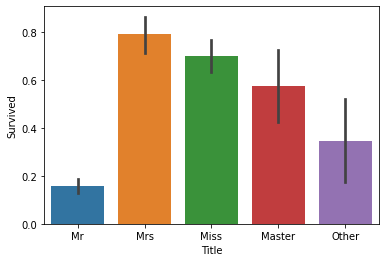

In [ ]:
sns.barplot(x="Title", y="Survived", data=titanic_df)

Now the `Title` variable can be converted into a categorical variable.

In [ ]:
titanic_df["Title_cat"] = titanic_df["Title"].map({'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Other' : 4})
display(titanic_df[["Title", "Title_cat"]])

,Title,Title_cat
0,Mr,0
1,Mrs,1
2,Miss,2
3,Mrs,1
4,Mr,0
...,...,...
886,Other,4
887,Miss,2
888,Miss,2
889,Mr,0


In [ ]:
titanic_df[["Title", "Title_cat"]].isna().any()

Title        False
Title_cat    False
dtype: bool

Now let's perform this manipulation on the test as well.

In [ ]:
test["Title"] = test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

test["Title"] = test["Title"].replace(["Lady", "Countess","Capt", "Col",\
 	"Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Other")

test["Title"] = test["Title"].replace("Mlle", "Miss")
test["Title"] = test["Title"].replace("Ms", "Miss")
test["Title"] = test["Title"].replace("Mme", "Mrs")

test["Title_cat"] = test["Title"].map({'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Other' : 4})

test["Title_cat"].isna().any()

False

#### Embarked Variable:
`Embarked` indicates in which port a passenger boarded the Titanic.  
It could be crutial to determine whether a passenger survived or not becuase it might indicate on a passenger's room location on the titanic.

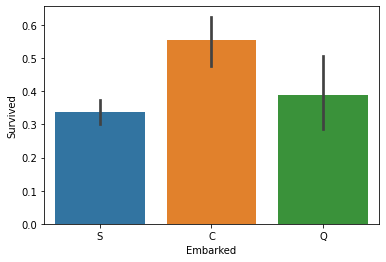

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=titanic_df)

It looks like there are some diffrences in surviving chances between the different `Embarked` locations.  
There are only 3 unique values, it will be converted into 3 binary variables.
But before we change the variavble into a numerical one, we need to fill the missing values, it can be filled with the most common value.

In [ ]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0])
titanic_df["Embarked_s"] = titanic_df["Embarked"].map({ 'S' : 1, 'C' : 0, 'Q' : 0, np.nan : 0}).astype(int)
titanic_df["Embarked_c"] = titanic_df["Embarked"].map({ 'S' : 0, 'C' : 1, 'Q' : 0, np.nan : 0}).astype(int)
titanic_df["Embarked_q"] = titanic_df["Embarked"].map({ 'S' : 0, 'C' : 0, 'Q' : 1, np.nan : 0}).astype(int)

display(titanic_df[["Embarked", "Embarked_s", "Embarked_c", "Embarked_q"]])
titanic_df["Embarked"].isna().any()

,Embarked,Embarked_s,Embarked_c,Embarked_q
0,S,1,0,0
1,C,0,1,0
2,S,1,0,0
3,S,1,0,0
4,S,1,0,0
...,...,...,...,...
886,S,1,0,0
887,S,1,0,0
888,S,1,0,0
889,C,0,1,0


False

The test dataset does not miss any `Embarked` values, let's just convert it to 3 binary variables as well.

In [ ]:
test["Embarked_s"] = test["Embarked"].map({ 'S' : 1, 'C' : 0, 'Q' : 0, np.nan : 0}).astype(int)
test["Embarked_c"] = test["Embarked"].map({ 'S' : 0, 'C' : 1, 'Q' : 0, np.nan : 0}).astype(int)
test["Embarked_q"] = test["Embarked"].map({ 'S' : 0, 'C' : 0, 'Q' : 1, np.nan : 0}).astype(int)

test[["Embarked_s", "Embarked_c", "Embarked_q"]].isna().any()

Embarked_s    False
Embarked_c    False
Embarked_q    False
dtype: bool

#### Sex Variable:
The gender of a passenger might have a strong connection to surviving chances because rescures might help first to women.


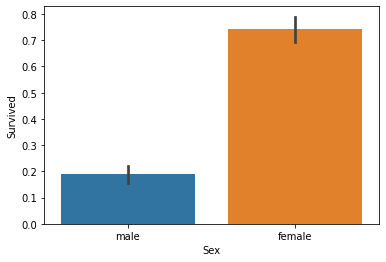

In [ ]:
sns.barplot(x="Sex", y="Survived", data=titanic_df)

As predicted, female had much higher chance to survive.  
`Sex` is a non-numerical column, we will convert into two binary variables `Male`, and `Female`.

In [ ]:
titanic_df["Male"] = 0
titanic_df["Female"] = 0
titanic_df["Male"] = titanic_df["Sex"].map( {'female': 0, 'male': 1} ).astype(int)
titanic_df["Female"] = titanic_df["Sex"].map( {'male': 0, 'female': 1} ).astype(int)
display(titanic_df[["Sex", "Male", "Female"]])

,Sex,Male,Female
0,male,1,0
1,female,0,1
2,female,0,1
3,female,0,1
4,male,1,0
...,...,...,...
886,male,1,0
887,female,0,1
888,female,0,1
889,male,1,0


Convert the test dataset to binary as well.

In [ ]:
test["Male"] = 0
test["Female"] = 0
test["Male"] = test["Sex"].map( {'female': 0, 'male': 1} ).astype(int)
test["Female"] = test["Sex"].map( {'male': 0, 'female': 1} ).astype(int)
test[["Male", "Female"]].isna().any()

Male      False
Female    False
dtype: bool

#### Pclass Variable:
`Pclass` indicates a passenger class, it indicates his room location and could affect his surviving chances.

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


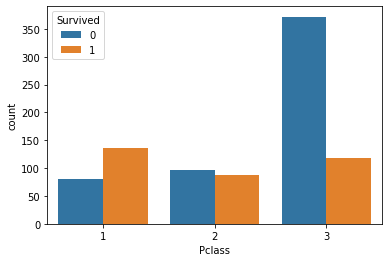

In [ ]:
temp = pd.crosstab(titanic_df.Pclass ,titanic_df.Survived, values=titanic_df.Survived, aggfunc='count').T.style.background_gradient() #Checking the Initials with the Sex
display(temp)
sns.countplot('Pclass',data=titanic_df, hue='Survived')

It is clear that a passenger from 1st class and 2nd class has much more chances to survive compare to 3rd class passengers.

#### Age Variable:
`Age` missing 177 value, not too much in terms of this data size, it can be filled with the median value of passengers with similar values, to decide which values, let's see the correlation between `Age` and the other features.

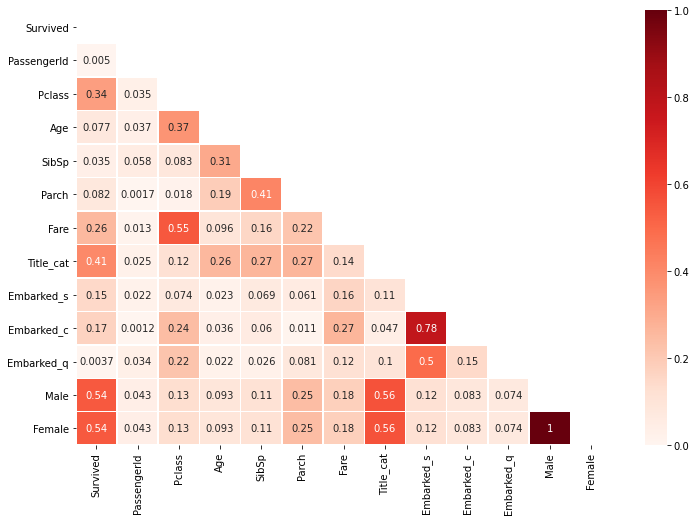

In [ ]:
corr = abs(titanic_df.corr())    # get the data correlation
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1, linewidth=.5)
plt.show()

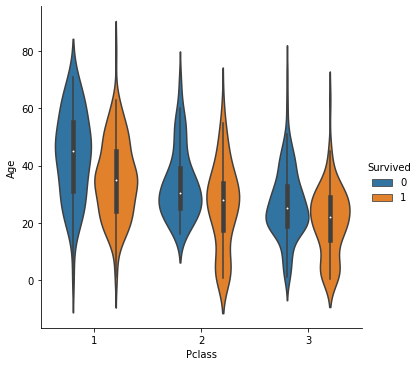

In [ ]:
sns.catplot(y="Age", x="Pclass", hue="Survived", kind="violin", data=titanic_df)

It look like there is a dipendency between `Age`, `Pclass`, and `Title_cat`.
Let's try to fill the emtpy `Age` values with the means of those 2 variables.

In [ ]:
age_mean = titanic_df.groupby(["Title_cat", "Pclass"])["Age"].mean()
print(age_mean)

Title_cat  Pclass
0          1         41.580460
           2         32.768293
           3         28.724891
1          1         40.400000
           2         33.682927
           3         33.515152
2          1         29.744681
           2         22.560606
           3         16.123188
3          1          5.306667
           2          2.258889
           3          5.350833
4          1         47.571429
           2         42.000000
Name: Age, dtype: float64


In [ ]:
for i in range(titanic_df["Title_cat"].nunique()):
     for j in range(age_mean[i].shape[0]):
            titanic_df.loc[ (titanic_df.Age.isnull()) & (titanic_df.Title_cat == i) & (titanic_df.Pclass == j +1 ), 'Age'] = age_mean[i][j+1]

                
print(titanic_df["Age"].isna().any())            
print(titanic_df["Age"])

False
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    16.123188
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


We need to fill the missing `Age` values in the test dataset.

In [ ]:
age_mean_test = test.groupby(["Title_cat", "Pclass"])["Age"].mean()
for i in range(test["Title_cat"].nunique()):
     for j in range(age_mean_test[i].shape[0]):
            test.loc[ (test.Age.isnull()) & (test.Title_cat == i) & (test.Pclass == j +1 ), 'Age'] = age_mean_test[i][j+1]
            
test.Age.isna().any()

False

#### Back to `Title`
Now after done handling the `Age` feature, we can convert the `Title_cat` into seperate binary features.

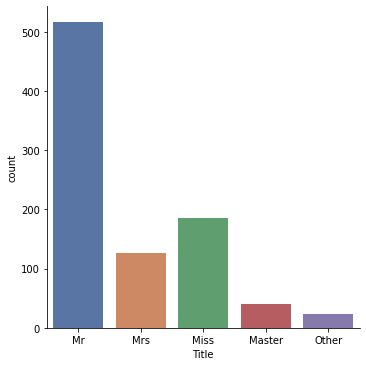

In [ ]:
sns.catplot(x="Title", kind="count", palette=sns.color_palette("deep"), data=titanic_df)

In [ ]:
def convert_titles_binary(data):
    data["Mr"] = 0
    data["Mrs"] = 0
    data["Miss"] = 0
    data["Master"] = 0
    data["Mr"] = data["Title"].map({'Mr' : 1, 'Mrs' : 0, 'Miss' : 0, 'Master' : 0, 'Other' : 0})
    data["Mrs"] = data["Title"].map({'Mr' : 0, 'Mrs' : 1, 'Miss' : 0, 'Master' : 0, 'Other' : 0})
    data["Miss"] = data["Title"].map({'Mr' : 0, 'Mrs' : 0, 'Miss' : 1, 'Master' : 0, 'Other' : 0})
    data["Master"] = data["Title"].map({'Mr' : 0, 'Mrs' : 0, 'Miss' : 0, 'Master' : 1, 'Other' : 0})

convert_titles_binary(titanic_df)
convert_titles_binary(test)

titanic_df[["Mr", "Mrs", "Miss", "Master"]].isna().any()
test[["Mr", "Mrs", "Miss", "Master"]].isna().any()

Mr        False
Mrs       False
Miss      False
Master    False
dtype: bool

#### Cabin Variable
`Cabin` which indicates where a passenger was staying at the titanic, is missing 687 values out of 891, that's about 77% of missing values.
For now we will try to drop that variable from this model and will see if adding it later on will improve the results.


In [ ]:
titanic_df.drop("Cabin", axis=1, inplace=True)
print(titanic_df.isna().any())

test.drop("Cabin", axis=1, inplace=True)
print(test.isna().any())

Survived       False
PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
Title          False
Title_cat      False
Embarked_s     False
Embarked_c     False
Embarked_q     False
Male           False
Female         False
Mr             False
Mrs            False
Miss           False
Master         False
dtype: bool
PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Embarked       False
Title          False
Title_cat      False
Embarked_s     False
Embarked_c     False
Embarked_q     False
Male           False
Female         False
Mr             False
Mrs            False
Miss           False
Master         False
dtype: bool


### Feature Engeneering

`Parch` and `SibSp` could be merged into one `FamilySize` variable.

In [ ]:
titanic_df["FamilySize"] = titanic_df["Parch"] + titanic_df["SibSp"] + 1
titanic_df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Creating the `FamilySize` variable for the test dataset as well.

In [ ]:
test["FamilySize"] = test["Parch"] + test["SibSp"] + 1

We can see that when a passenger has some relatives traveled with him, he had some better chances to survived.  
We can create another feature that might increase the model accuracy.  
`IsAlone` feature will indicate whether a passenger was traveling alone or with relatives.

In [ ]:
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

We can assume that as the age growth, the class of a passenger could growth too, lets see a graph to demonstrate.

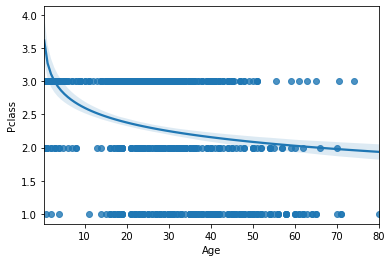

In [ ]:
sns.regplot(x="Age", y="Pclass", data=titanic_df, logx=True)

We know the 1st class is better than 2nd class, and 2nd class is better than 3rd class.  
In this graph we can actually see that the more a passenger is older, his class is higher.

As observed before, it look like `Pclass`, and `Age` have some correlation between them, we may assume that the age of a passenger's may indicates which class he was travled at.  
Older people sometimes tend to have more money and it could indicate they traveled in higher class.  
We will try to create a new feature `AgePclass` as a multiplation between those two features.

In [ ]:
titanic_df["AgePclass"] = titanic_df["Age"] * titanic_df["Pclass"]
test["AgePclass"] = test["Age"] * test["Pclass"]

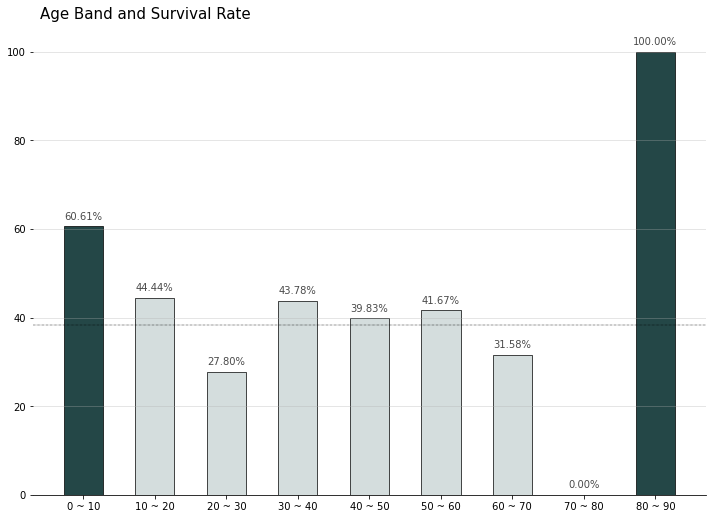

In [ ]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

        
titanic_df['age_band'] = titanic_df['Age'].apply(age_band)
titanic_age = titanic_df[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# ax2
color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747'

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)



for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = titanic_df['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band and Survival Rate', fontsize=15)

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

From this graph it looks like there are different surviving chances across the different age bands.  
We will create a new `AgeBand` feature.

In [ ]:
def createAgeBand(dataset):
    dataset.loc[ dataset['Age'] <= 10, 'AgeBand'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'AgeBand'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'AgeBand'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'AgeBand'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'AgeBand'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'AgeBand'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'AgeBand'] = 6
    dataset.loc[(dataset['Age'] > 70) & (dataset['Age'] <= 80), 'AgeBand'] = 7
    dataset.loc[ dataset['Age'] > 80, 'AgeBand'] = 8
    

createAgeBand(titanic_df)
titanic_df.AgeBand.isna().any()

False

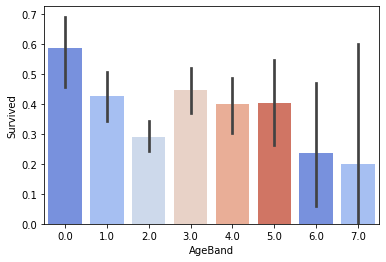

In [ ]:
sns.barplot(x="AgeBand", y="Survived", palette=sns.color_palette("coolwarm"), data=titanic_df)

In [ ]:
createAgeBand(test)
test.AgeBand.isna().any()

False

## Train

In [ ]:
print(titanic_df.isna().sum().any())
print(test.isna().sum().any())

False
True


### SGD Train with `FamilySize` Featrure:

In [ ]:
data_fs = titanic_df[["AgePclass", "Fare", "Mr", "Mrs", "Miss", "Master", "Embarked_s", "Embarked_c", "Embarked_q", "Male", "Female", "FamilySize", "Survived"]]
t_fs = data_fs["Survived"]
x_fs = data_fs.drop('Survived', axis=1)

x_train_fs, x_test_fs, t_train_fs, t_test_fs = sklearn.model_selection.train_test_split(x_fs, t_fs, test_size=0.2, random_state=0)
SGD_cls_fs = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train_fs, t_train_fs)
y_train_prob_fs = SGD_cls_fs.predict_proba(x_train_fs)
y_test_prob_fs = SGD_cls_fs.predict_proba(x_test_fs)


In [ ]:
acurSGD_fs_train = SGD_cls_fs.score(x_train_fs, t_train_fs)
acurSGD_fs_valid = SGD_cls_fs.score(x_test_fs, t_test_fs)
ceSGD_fs_train = metrics.log_loss(t_train_fs, y_train_prob_fs)
ceSGD_fs_valid = metrics.log_loss(t_test_fs, y_test_prob_fs)

print('Accuracy score on train', acurSGD_fs_train)
print('Accuracy score on validation', acurSGD_fs_valid)
print()
print('CE on train', ceSGD_fs_train)
print('CE on test',ceSGD_fs_valid)

Accuracy score on train 0.8300561797752809
Accuracy score on validation 0.8156424581005587

CE on train 0.418160987164844
CE on test 0.41881314026521693


### SGD Train with `IsAlone` Featrure:

In [ ]:
data_ia = titanic_df[["AgePclass", "Fare", "Mr", "Mrs", "Miss", "Master", "Embarked_s", "Embarked_c", "Embarked_q", "Male", "Female", "IsAlone", "Survived"]]
t_ia = data_ia["Survived"]
x_ia = data_ia.drop('Survived', axis=1)

x_train_ia, x_test_ia, t_train_ia, t_test_ia = sklearn.model_selection.train_test_split(x_ia, t_ia, test_size=0.2, random_state=0)
SGD_cls_ia = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train_ia, t_train_ia)
y_train_prob_ia = SGD_cls_ia.predict_proba(x_train_ia)
y_test_prob_ia = SGD_cls_ia.predict_proba(x_test_ia)

In [ ]:
acurSGD_ia_train = SGD_cls_ia.score(x_train_ia, t_train_ia)
acurSGD_ia_valid = SGD_cls_ia.score(x_test_ia, t_test_ia)
ceSGD_ia_train = metrics.log_loss(t_train_ia, y_train_prob_ia)
ceSGD_ia_valid = metrics.log_loss(t_test_ia, y_test_prob_ia)

print('Accuracy score on train', acurSGD_ia_train)
print('Accuracy score on validation', acurSGD_ia_valid)
print()
print('CE on train', ceSGD_ia_train)
print('CE on test',ceSGD_ia_valid)

Accuracy score on train 0.8061797752808989
Accuracy score on validation 0.7932960893854749

CE on train 0.4454623059578102
CE on test 0.45251014561804437


We get better results with `FamilySize` feature and not with `IsAlone` so we will continue with it.

### SGD Train with `AgeBand` Featrure:

In [ ]:
data_ab = titanic_df[["AgePclass", "AgeBand", "Fare", "Mr", "Mrs", "Miss", "Master", "Embarked_s", "Embarked_c", "Embarked_q", "Male", "Female", "FamilySize", "Survived"]]
t_ab = data_ab["Survived"]
x_ab = data_ab.drop('Survived', axis=1)

x_train_ab, x_test_ab, t_train_ab, t_test_ab = sklearn.model_selection.train_test_split(x_ab, t_ab, test_size=0.2, random_state=0)
SGD_cls_ab = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train_ab, t_train_ab)
y_train_prob_ab = SGD_cls_ab.predict_proba(x_train_ab)
y_test_prob_ab = SGD_cls_ab.predict_proba(x_test_ab)

In [ ]:
acurSGD_ab_train = SGD_cls_ab.score(x_train_ab, t_train_ab)
acurSGD_ab_valid = SGD_cls_ab.score(x_test_ab, t_test_ab)
ceSGD_ab_train = metrics.log_loss(t_train_ab, y_train_prob_ab)
ceSGD_ab_valid = metrics.log_loss(t_test_ab, y_test_prob_ab)

print('Accuracy score on train', acurSGD_ab_train)
print('Accuracy score on validation', acurSGD_ab_valid)
print()
print('CE on train', ceSGD_ab_train)
print('CE on test',ceSGD_ab_valid)

Accuracy score on train 0.8314606741573034
Accuracy score on validation 0.8156424581005587

CE on train 0.4170317626502636
CE on test 0.4160533086351521


We can see that the accuracy is a little bit higher and the loss is a little bit smaller in this model.

### MLP Train with `FamilySize` Featrure:

In [ ]:
MLP_cls_fs = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(x_train_fs, t_train_fs)
y_train_prob_fs = MLP_cls_fs.predict_proba(x_train_fs)
y_test_prob_fs = MLP_cls_fs.predict_proba(x_test_fs)

In [ ]:
acurMLP_fs_train =  MLP_cls_fs.score(x_train_fs, t_train_fs)
acurMLP_fs_valid = MLP_cls_fs.score(x_test_fs, t_test_fs)
ceMLP_fs_train = metrics.log_loss(t_train_fs, y_train_prob_fs)
ceMLP_fs_valid = metrics.log_loss(t_test_fs, y_test_prob_fs)

print('Accuracy score on train', acurMLP_fs_train)
print('Accuracy score on validation', acurMLP_fs_valid)
print()
print('CE on train', ceMLP_fs_train)
print('CE on test',ceMLP_fs_valid)

Accuracy score on train 0.8202247191011236
Accuracy score on validation 0.8044692737430168

CE on train 0.44298631739744443
CE on test 0.4174316409921977


### MLP Train with `IsAlone` Featrure:

In [ ]:
MLP_cls_ia = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(x_train_ia, t_train_ia)
y_train_prob_ia = MLP_cls_ia.predict_proba(x_train_ia)
y_test_prob_ia = MLP_cls_ia.predict_proba(x_test_ia)

In [ ]:
acurMLP_ia_train =  MLP_cls_ia.score(x_train_ia, t_train_ia)
acurMLP_ia_valid = MLP_cls_ia.score(x_test_ia, t_test_ia)
ceMLP_ia_train = metrics.log_loss(t_train_ia, y_train_prob_ia)
ceMLP_ia_valid = metrics.log_loss(t_test_ia, y_test_prob_ia)

print('Accuracy score on train', acurMLP_ia_train)
print('Accuracy score on validation', acurMLP_ia_valid)
print()
print('CE on train', ceMLP_ia_train)
print('CE on test',ceMLP_ia_valid)

Accuracy score on train 0.7851123595505618
Accuracy score on validation 0.7821229050279329

CE on train 0.4831006602923649
CE on test 0.46517524127934795


### MLP Train with `AgeBand` Featrure:

In [ ]:
MLP_cls_ab = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(x_train_ab, t_train_ab)
y_train_prob_ab = MLP_cls_ab.predict_proba(x_train_ab)
y_test_prob_ab = MLP_cls_ab.predict_proba(x_test_ab)

In [ ]:
acurMLP_ab_train =  MLP_cls_ab.score(x_train_ab, t_train_ab)
acurMLP_ab_valid = MLP_cls_ab.score(x_test_ab, t_test_ab)
ceMLP_ab_train = metrics.log_loss(t_train_ab, y_train_prob_ab)
ceMLP_ab_valid = metrics.log_loss(t_test_ab, y_test_prob_ab)

print('Accuracy score on train', acurMLP_ab_train)
print('Accuracy score on validation', acurMLP_ab_valid)
print()
print('CE on train', ceMLP_ab_train)
print('CE on test',ceMLP_ab_valid)

Accuracy score on train 0.8103932584269663
Accuracy score on validation 0.8044692737430168

CE on train 0.45133958591620976
CE on test 0.42485926413863645


## Compare the Models

In [ ]:
print([acurSGD_fs_train, acurSGD_ia_train, acurSGD_ab_train, acurMLP_fs_train, acurMLP_ia_train, acurMLP_ab_train])
print([acurSGD_fs_valid, acurSGD_ia_valid, acurSGD_ab_valid, acurMLP_fs_valid, acurMLP_ia_valid, acurMLP_ab_valid])
print([ceSGD_fs_train, ceSGD_ia_train, ceSGD_ab_train, ceMLP_fs_train, ceMLP_ia_train, ceMLP_ab_train])
print([ceSGD_fs_valid, ceSGD_ia_valid, ceSGD_ab_valid, ceMLP_fs_valid, ceMLP_ia_valid, ceMLP_ab_valid])


[0.8300561797752809, 0.8061797752808989, 0.8314606741573034, 0.8202247191011236, 0.7851123595505618, 0.8103932584269663]
[0.8156424581005587, 0.7932960893854749, 0.8156424581005587, 0.8044692737430168, 0.7821229050279329, 0.8044692737430168]
[0.418160987164844, 0.4454623059578102, 0.4170317626502636, 0.44298631739744443, 0.4831006602923649, 0.45133958591620976]
[0.41881314026521693, 0.45251014561804437, 0.4160533086351521, 0.4174316409921977, 0.46517524127934795, 0.42485926413863645]


In [ ]:
names = ["SGD FamilySize", "SGD IsAlone", "SGD FamilySize-AgeBand", "MLP FamilySize", "MLP IsAlone", "MLP FamilySize-AgeBand"]
train_acur = [acurSGD_fs_train, acurSGD_ia_train, acurSGD_ab_train, acurMLP_fs_train, acurMLP_ia_train, acurMLP_ab_train]
valid_acur = [acurSGD_fs_valid, acurSGD_ia_valid, acurSGD_ab_valid, acurMLP_fs_valid, acurMLP_ia_valid, acurMLP_ab_valid]
train_loss = [ceSGD_fs_train, ceSGD_ia_train, ceSGD_ab_train, ceMLP_fs_train, ceMLP_ia_train, ceMLP_ab_train]
valid_loss = [ceSGD_fs_valid, ceSGD_ia_valid, ceSGD_ab_valid, ceMLP_fs_valid, ceMLP_ia_valid, ceMLP_ab_valid]

df = pd.DataFrame(list(zip(names, train_acur, valid_acur, train_loss, valid_loss)), columns = ['Name', 'Train_accuracy', 'Validation_accuracy', 'Train_loss', 'Validation_loss'])

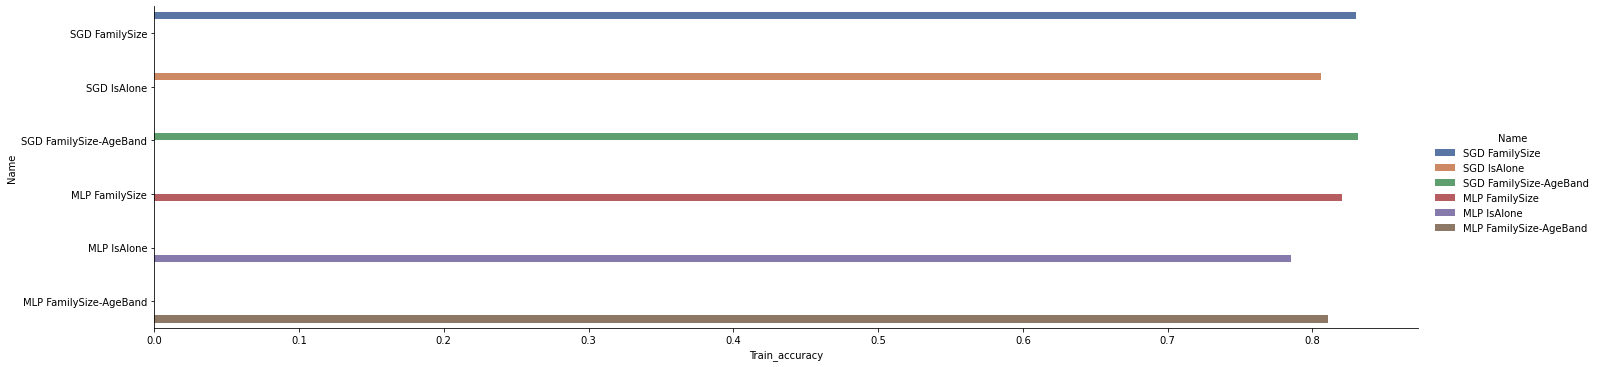

In [ ]:
sns.catplot(x="Train_accuracy", y="Name", hue="Name", kind="bar", palette=sns.color_palette("deep"), data=df, height=5, aspect=4)

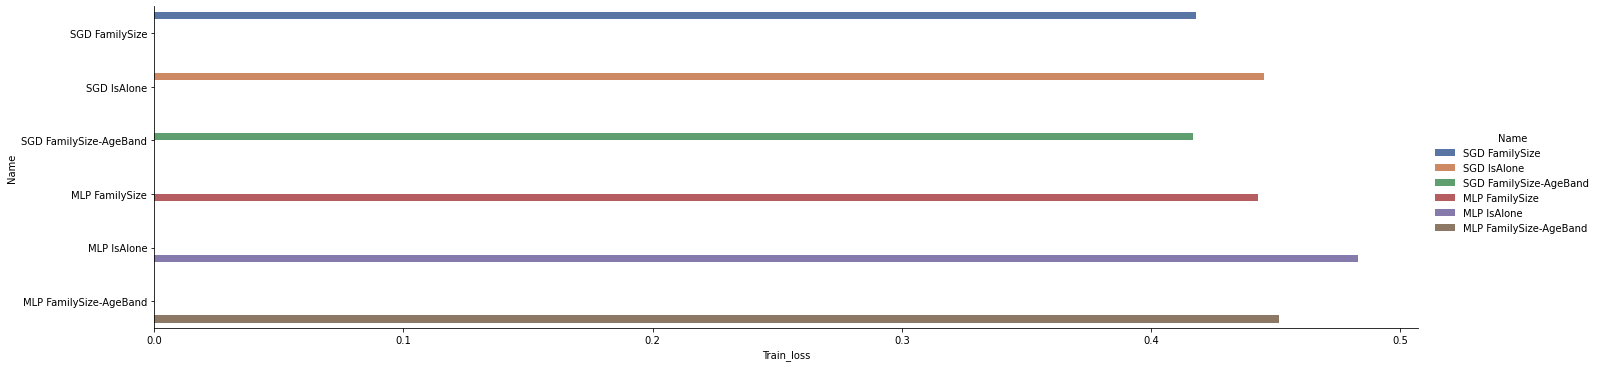

In [ ]:
sns.catplot(x="Train_loss", y="Name", hue="Name", kind="bar", palette=sns.color_palette("deep"), data=df, height=5, aspect=4)

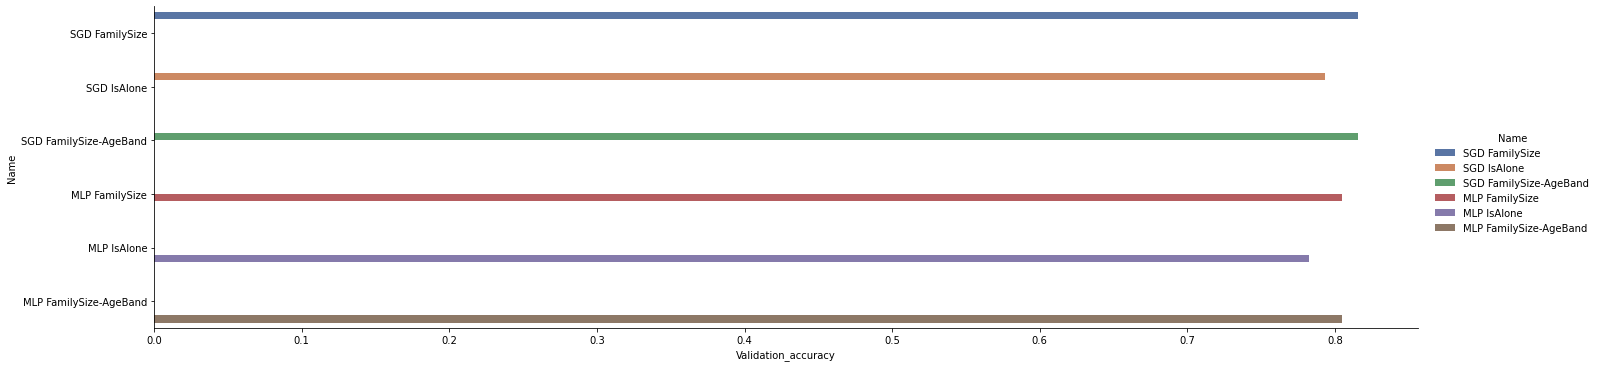

In [ ]:
sns.catplot(x="Validation_accuracy", y="Name", hue="Name", kind="bar", palette=sns.color_palette("deep"), data=df, height=5, aspect=4)

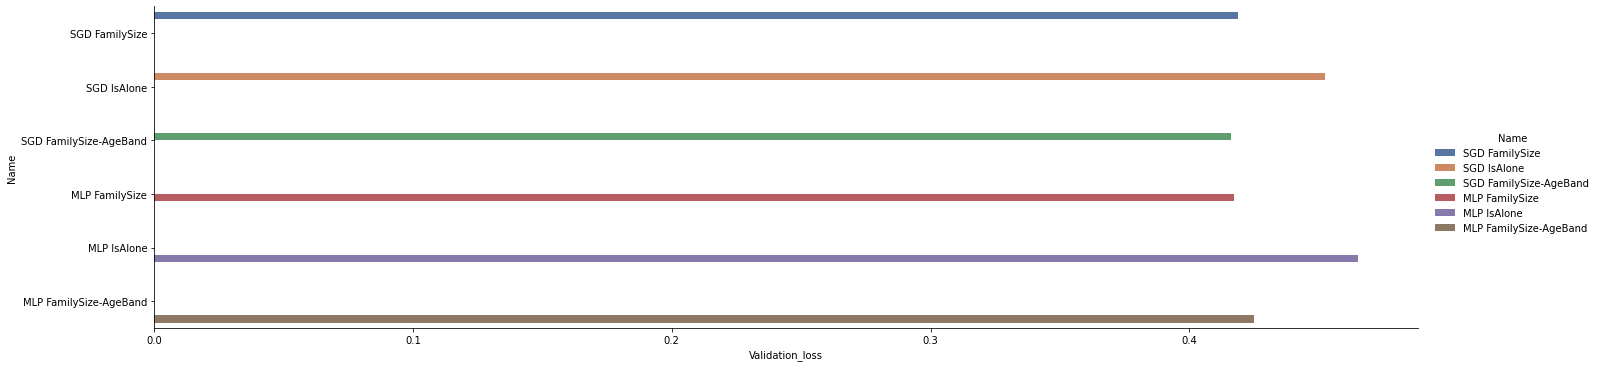

In [ ]:
sns.catplot(x="Validation_loss", y="Name", hue="Name", kind="bar", palette=sns.color_palette("deep"), data=df, height=5, aspect=4)

We can see that the best train results was with SGD with `AgeBand` feature.  
The best validation results was with SGD with `AgeBand` feature as well.  
Also, the smallest loss (train, and validation) was with SGD with `AgeBand` feature.  
So we will use this model with the test.

## Test

The test dataset missing one value in `Fare` variable, we will fill it with the mean of passengers with the same `Pclass`, `Title_cat`.

In [ ]:
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
test.Fare.isna().any()

False

In [ ]:
test_ac = test[["AgePclass", "AgeBand", "Fare", "Mr", "Mrs", "Miss", "Master", "Embarked_s", "Embarked_c", "Embarked_q", "Male", "Female", "FamilySize"]]

y_pred = SGD_cls_ab.predict(test_ac)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

## Score

![](https://user-images.githubusercontent.com/52006798/99272182-2b9a3600-2830-11eb-9432-a078aad8da1c.jpg)
![](https://user-images.githubusercontent.com/52006798/99245606-85890480-280c-11eb-8ac3-c0783006dacf.jpg)
![](https://user-images.githubusercontent.com/52006798/99245667-a2bdd300-280c-11eb-8149-dcd446f4e8d5.jpg)

## Conclusions
At this exercise I have to investigate the data of passengers on the Titanic, I learned to fill in missing data and plotting the data. I have tried a different method of investigating and decide which features are more important for a good classification.
I have tried different models and different features in order to get better results.

## Links


* Fill `Embarked` missing values with the most common values. [Suggested here](https://www.kaggle.com/startupsci/titanic-data-science-solutions#Completing-a-categorical-feature)

* Create `Title` feature instead of `Name`. [Suggested here](https://www.kaggle.com/startupsci/titanic-data-science-solutions#Creating-new-feature-extracting-from-existing)

* Drop `PassengerId`, `Cabin` and `Ticket`. [Suggested here](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy#3.22-Clean-Data)

* Dropping `SibSp` and `Parch` in favor for `FamilySize` feature. [Suggested here](https://www.kaggle.com/startupsci/titanic-data-science-solutions#Create-new-feature-combining-existing-features)

* Consider `isAlone` feature instead of `SibSp`, `Parch` and `FamilySize`. [Suggested here](https://www.kaggle.com/startupsci/titanic-data-science-solutions#Create-new-feature-combining-existing-features)

* Consider change `Age` into an ordinal variable based on age ranges. [Suggested here](https://www.kaggle.com/startupsci/titanic-data-science-solutions#Create-new-feature-combining-existing-features)

# Exercise 3
In this assignment, we need to base our models on the previous data exploration assignment.  
I will do cross-validation on the different models, try to tune some hyper-parameters to get better results of the models and try to find the best subset of features that maximize the score.
I will compare a linear classifier model with a KNN model and finally submit again the prediction of who survived and who does not.

## Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tqdm.auto import tqdm

# sklearn imports
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

## Checking the Data

Before starting anything, let's make sure we do not have any null values by mistake.

In [ ]:
t = titanic_df['Survived'].copy()
X = titanic_df.drop(['Survived',	'PassengerId',	'Name',	'Ticket', 'Title_cat', 'Embarked_s',	'Embarked_c',	'Embarked_q', 'Male',	'Female',	'Mr',	'Mrs',	'Miss',	'Master',	'age_band'], axis=1)

Okay, the data is ready to go, let's divide the columns into categorical, numerical, and ordinal.

In [ ]:
display(X)
display(t)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgePclass,AgeBand
0,3,male,22.000000,1,0,7.2500,S,Mr,2,0,66.000000,2.0
1,1,female,38.000000,1,0,71.2833,C,Mrs,2,0,38.000000,3.0
2,3,female,26.000000,0,0,7.9250,S,Miss,1,1,78.000000,2.0
3,1,female,35.000000,1,0,53.1000,S,Mrs,2,0,35.000000,3.0
4,3,male,35.000000,0,0,8.0500,S,Mr,1,1,105.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,Other,1,1,54.000000,2.0
887,1,female,19.000000,0,0,30.0000,S,Miss,1,1,19.000000,1.0
888,3,female,16.123188,1,2,23.4500,S,Miss,4,0,48.369565,1.0
889,1,male,26.000000,0,0,30.0000,C,Mr,1,1,26.000000,2.0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X["Age"] = X["Age"].astype(int)
X["AgeBand"] = X["AgeBand"].astype(int)
X["IsAlone"] = X["IsAlone"].map({ 1: True, 0: False })

## Encoding the Data

In [ ]:

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
ordinal_cols = []

In [ ]:
print("Numerical:\t", numerical_cols)
print("Categorical:\t", categorical_cols)
print("Ordinal:\t", ordinal_cols)

Numerical:	 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'AgePclass',
       'AgeBand'],
      dtype='object')
Categorical:	 Index(['Sex', 'Embarked', 'Title', 'IsAlone'], dtype='object')
Ordinal:	 []


## Cross-Validation

Now let's define some functions for cross-validation.

In [ ]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
      cv = KFold(n_splits=k, shuffle=True, random_state=2)
    elif p is not None:
      cv = LeavePOut(p)
    else:
      raise ValueError("Must specify either `K` or `P`.")

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict_proba(X_train)
        y_val = model.predict_proba(X_val)

        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), metrics.log_loss(t_train, y_train, labels=[0, 1])]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), metrics.log_loss(t_val, y_val, labels=[0, 1])]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Validation Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Validation Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss, confusion_matrix(t_train, model.predict(X_train)), confusion_matrix(t_val, model.predict(X_val))

Let's see the general results of cross-validation so far, we will use 10-k-fold.

In [ ]:
ct = ColumnTransformer([
    ("encoding_ohe", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols),
    ("ordinal", OrdinalEncoder(), ordinal_cols)])

model_pipe = make_pipeline(ct, SGDClassifier(loss='log', random_state=2))
val_score, val_loss, train_score, train_loss, train_cm, valid_cm = get_cv_score_and_loss(X, t, model_pipe, k=10, show_score_loss_graphs=True)

Now let's print the confiusion matrix and calculate the KPI's statistics of the training and the validation.

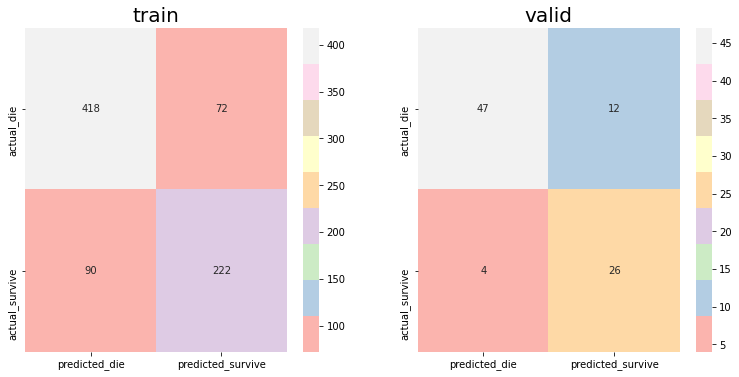

Train: precision 0.76, recall 0.71, specificity 0.85, fpr 0.15, accuracy 0.80
Valid: precision 0.68, recall 0.87, specificity 0.80, fpr 0.20, accuracy 0.82


In [ ]:
def print_conf_mat_train_valid(cm_train, cm_valid):
    cm_train_df = pd.DataFrame(cm_train, index=['actual_die', 'actual_survive'], columns=['predicted_die', 'predicted_survive'])
    cm_val_df = pd.DataFrame(cm_valid, index=['actual_die', 'actual_survive'], columns=['predicted_die', 'predicted_survive'])

    fig, ax = plt.subplots(ncols=2, figsize=(10,3))
    i = 0
    for mat, name in zip([cm_train_df, cm_val_df], ['train', 'valid']):
        fig = sns.heatmap(mat, annot=True, ax=ax[i], cmap=plt.cm.Pastel1, fmt='g')
        fig.set_title(name,  fontsize=20.0)
        i += 1

    plt.subplots_adjust(top=1.5, bottom=0, left=0, right=1)
    plt.show()

print_conf_mat_train_valid(train_cm, valid_cm)

def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

print(f'Train: precision {precision(train_cm):.2f}, recall {recall(train_cm):.2f}, specificity {specificity(train_cm):.2f}, fpr {fpr(train_cm):.2f}, accuracy {accuracy(train_cm):.2f}')
print(f'Valid: precision {precision(valid_cm):.2f}, recall {recall(valid_cm):.2f}, specificity {specificity(valid_cm):.2f}, fpr {fpr(valid_cm):.2f}, accuracy {accuracy(valid_cm):.2f}')

We would like to see high precision, recall, specificity, accuracy, and low fpr.  
We can see from these numbers:
* Precision in both is not very high, which indicates that our false-negative is quite high. In other words, there are a lot of passengers the model predicted that survived, but died. 
* Recall in validation set is quite good, which means the model's false-negative is low. It means that the number of passengers the model falsely predicted that died but they did not, is not high (the actual number is 6). 
* Specificity in both is not high, which means the model's false positive is high. That means that out of the passenger who died, the model predicted a lot of them as they survived. 

We would like to improve the recall and precision scores, that means we want to reduce the `FP` and `FN`, let's calculate the `F1-Score` which is the harmonic mean of reacall and precision.

In [ ]:
def f1(cm):
    precision_calc = precision(cm)
    recall_calc = recall(cm)
    return (2*precision_calc*recall_calc)/(precision_calc+recall_calc)

print(f'Train: f1 {f1(train_cm):.2f}')
print(f'Valid: f1 {f1(valid_cm):.2f}')

Train: f1 0.73
Valid: f1 0.76


Quite low score, we can try to change the threshold of the prediction.

In [ ]:
# plot graph of precision and recall as function of the threshold
def plot_precision_recall_by_threshold(labels, probabilities):
    precision_recall_df = pd.DataFrame(columns=['threshold', 'precision', 'recall'])
    for threshold in np.linspace(0.1, 1, 9, endpoint=False):
        preds = np.where(probabilities[:,1] > threshold, 1, 0)
        cm = confusion_matrix(labels, preds)
        precision_recall_df.loc[len(precision_recall_df)] = [threshold, precision(cm), recall(cm)]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=precision_recall_df["threshold"], y=precision_recall_df["precision"], name="Precision"))
    fig.add_trace(go.Scatter(x=precision_recall_df["threshold"], y=precision_recall_df["recall"], name="Recall"))

    fig.show()

y_proba_train = model_pipe.predict_proba(X)
plot_precision_recall_by_threshold(t, y_proba_train)

We wish to maximize both scores, we can see that we would get them both as high as possible in the same threshold is with 0.5, therfore, we will not change it.  
Let's try to plot the ROC curve for better understanding it.

In [ ]:
# plot ROC curve and calculate AUC score
def plot_roc_curve(labels_t, probabilities_t, labels_v=[], probabilities_v=[]):
    fig = go.Figure()
    title = ""
    for name, labels, probabilities in zip(["Train", "Valid"], [labels_t, labels_v], [probabilities_t, probabilities_v]):
        if len(labels) == 0:
            continue
        auc_score = roc_auc_score(labels, probabilities[:,1])
        fpr, tpr, thresholds = roc_curve(labels, probabilities[:,1], pos_label=1)
        roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
        fig.add_trace(go.Scatter(x=roc_df["fpr"], y=roc_df["tpr"], name=name, mode='lines'))
        title += f'{name} AUC: {auc_score:.2f}\t' 
    fig.update_layout(title=title)
    fig.show()

y_proba_train = model_pipe.predict_proba(X)
plot_roc_curve(t, y_proba_train)

As the ROC curve is base on `Recall` and `FPR` (which we would like to maintain low), we would like to see the curve getting high while the `FPR` remains low, in other words, we want to see the curve soared in small values.
From the AUC score, we can understand that it is not as good as we would want to see, let's try to select the best features, and tuning the hyper-parameters.

## Polynomial Degree

Now let's do see if we can get better results with a different polynomial degree.

In [ ]:
# show graph of score and loss by plynomial degree of numerical features
def show_degree_graphs_cv_train(X, t, model, k, max_degree=10):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    ordinal_cols = []
    
    val_train_score_loss_df = pd.DataFrame(columns=['degree', 'split', 'score', 'loss'])
    for i in tqdm(range(1, max_degree), desc='Poly Degree'):
        ct_enc_std_poly = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard_poly", make_pipeline(PolynomialFeatures(degree=i), StandardScaler()), numerical_cols),
            ("ordinal_poly", make_pipeline(PolynomialFeatures(degree=i), OrdinalEncoder()), ordinal_cols)])
        model_pipe = make_pipeline(ct_enc_std_poly, model)
        val_score, val_loss, train_score, train_loss, train_cm, valid_cm = get_cv_score_and_loss(X, t, model_pipe, k=k, show_score_loss_graphs=False, use_pbar=False)
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'train', train_score, train_loss]
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'cv', val_score, val_loss]

    fig = px.line(val_train_score_loss_df, x='degree', y='score', color='split')
    fig.show()
    fig = px.line(val_train_score_loss_df, x='degree', y='loss', color='split')
    fig.show()
    
show_degree_graphs_cv_train(X, t, SGDClassifier(loss='log', random_state=2), k=5, max_degree=10)

We can see that the best loss and score are with a polynomial degree of 1.

## Hyper-Parameters Tuning

After we have found our most significant features, now let's try tuning the hyper-parameters of the SGDClassifier.  
We will use `GridSearchCV` to find the subset of hyper-parametric that gives us the best accuracy score.  
The `GridSearchCV` algorithm creates the power set of all the parameters we gave it, train a model with each subset, and finally save the model which performs best.

In [ ]:
ct = ColumnTransformer([
    ("encoding_ohe", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols),
    ("ordinal", OrdinalEncoder(), ordinal_cols)])

X_encoded = pd.DataFrame(ct.fit_transform(X))

In [ ]:
hyper_parameter = { 'penalty': ('l1', 'l2', 'elasticnet'),
                    'alpha': [0.1, 0.01, 0.001, 0.0001],
                    'max_iter': [1000, 500],
                    'learning_rate': ('constant', 'optimal', 'invscaling', 'adaptive'),
                    'eta0': [0.1, 0.01, 0.001, 0.0001] }

gs_model = GridSearchCV(SGDClassifier(loss='log', random_state=2), hyper_parameter).fit(X_encoded, t)
print('grid search score:', gs_model.best_score_)
print('grid search params:', gs_model.best_params_)

grid search score: 0.827154604230745
grid search params: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'l2'}


We can see that the best results are with `Ridge` normalization, `eta0` as 0.1 which the initial state of the learning rate.

## Feature Selection
Now, let's see which subset is the best to maximize the score.  
We will use a greedy algorithm that each time pick the best `k` features, we will run it from `1` to `num_of_features`.

In [ ]:
def select_features(x, t, k=10, model_params={}):
  initial_state = 1
  features = None
  scores = pd.DataFrame(columns=["num", "val_score", "val_loss", "train_score", "train_loss"])
  for i in tqdm(range(initial_state, len(x.keys()) + 1), desc='Feature Selection'):
    selector = RFE(SGDClassifier(loss='log', random_state=2, **model_params), n_features_to_select=i).fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss, train_cm, valid_cm = get_cv_score_and_loss(x, t, selector, k=k, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    if i == initial_state or mean_val_score > scores["val_score"].max():
      features = selector.support_
    scores.loc[i] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["num"], y=scores["val_score"]))
  fig.update_xaxes(title_text="Number of features selected")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  return features, scores["val_score"].max()

best_model_ft, best_score = select_features(X_encoded, t, k=10, model_params=gs_model.best_params_)
print("Number of features: {} with score {}".format(len(X_encoded.loc[:, best_model_ft].keys()), best_score))

Number of features: 18 with score 0.8316978776529339


In [ ]:
X_best_feature = X_encoded.loc[:, best_model_ft]

We can see that out of 20 encoded features (after encoding the categorical to `OHE`), the best result is with 18 features.

## Ensemble

First of all, let's try to use a bagging ensemble with N-fold which is the same as K-Fold, we will create 20 models using the K-Fold method and use all of the 20 models to predict.

In [ ]:
bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(loss='log', random_state=2, **gs_model.best_params_), n_estimators=20, random_state=2, bootstrap=False).fit(X_best_feature, t)
print("bag_fold_model mean score:", bag_fold_model.score(X_best_feature, t))

bag_fold_model mean score: 0.8338945005611672


Now, let's try the bootstrap method, which picks randomly samples from the dataset, and duplicate them. This method leads to increasing the size of the sample in the dataset. The unique samples in the dataset will be used to train the models and the non-unique samples will be used as a validation set.

In [ ]:
bag_boot_model = BaggingClassifier(base_estimator=SGDClassifier(loss='log', random_state=2, **gs_model.best_params_), n_estimators=20, random_state=2, bootstrap=True).fit(X_best_feature, t)
print("bag_boot_model mean score:", bag_boot_model.score(X_best_feature, t))

bag_boot_model mean score: 0.835016835016835


We can see that with BaggingClassifier we get the best results when using N-Fold (K-Fold), which gives us the best results for this point.
Now, let's try to use a boosting method with AdaBoostClassifier.

In [ ]:
ada_boost_model = AdaBoostClassifier(base_estimator=SGDClassifier(loss='log', **gs_model.best_params_), n_estimators=100, random_state=2, algorithm='SAMME').fit(X_best_feature, t)
print("ada_boost_model mean score:", ada_boost_model.score(X_best_feature, t))

ada_boost_model mean score: 0.8181818181818182


Let's plot the graphs of the models.

In [ ]:
# show the accuracy by model
hp_models = {'BaggingClassifier (Fold)': bag_fold_model, 'BaggingClassifier (Bootstrap)': bag_boot_model, 'AdaBoostClassifier': ada_boost_model}

def show_accuracy_by_model(X_train, t_train, X_val, t_val, models):
    accuracy_df = pd.DataFrame(columns=['model_name', 'split', 'accuracy'])

    for model_name, model in models.items():
        model_pipe = make_pipeline(model)
        model_pipe.fit(X_train, t_train)
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'train', model_pipe.score(X_train, t_train)]
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'val', model_pipe.score(X_val, t_val)]

    fig = px.bar(accuracy_df, x='model_name', y='accuracy', color='split', barmode='group')
    fig.show()


X_t, X_v, t_t, t_v = model_selection.train_test_split(X_best_feature, t, test_size=0.2, random_state=2)
show_accuracy_by_model(X_t, t_t, X_v, t_v, hp_models)

As for ensembling models, although the best score (accuracy) was given to the BaggingClassifier with Bootstrap, we can see that actually, the best score for the validation was given to the BaggingClassifier with N-Fold.

In [ ]:
y_proba_t = bag_fold_model.predict_proba(X_t)
y_proba_v = bag_fold_model.predict_proba(X_v)
plot_roc_curve(t_t, y_proba_t, t_v, y_proba_v)

We get a pretty good result with the BagginClassifier with K-Fold, now let's try different models.

## KNN
`KNN` does not do any training actually, it uses the distance from a test sample from the nearest `k` training samples to classify its prediction.  
The model is based on the assumption that the data distributed in a similar way between each label we are trying to classify.  
We will use `GridSearchCV` to determine the best amount of neighbors needed to predict the best results, and different ways to calculate the distance between the samples.

In [ ]:
hyper_parameters = { 'n_neighbors': list(range(1, 100)),
                     'weights': ('uniform', 'distance'),
                     'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute') }

gs_neigh_model = GridSearchCV(KNeighborsClassifier(), hyper_parameters).fit(X_best_feature, t)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Accuracy score for classification:
gs_neigh_model 0.8226727763480006
best params {'algorithm': 'ball_tree', 'n_neighbors': 53, 'weights': 'uniform'}


So we get a good result with KNN, with the GridSearchCV we search for the best `K`, between 1 to 100 and we can see that the best result is with `53-NN` and the score is `0.82267`, which is not better than the ensemble model we got earlier.

## Naive-Bayes
The `Naive-Bayes` method is based on the assumption that every 2 features are conditional independent.  
It is considered as a decent classifier and as a bad estimator so we will not give a big weight for its results.  
To use the Naive-Bayes method to determine passenger's survival rate, we will use `MultinomialNB`, but it would not accept negative values, so we can not use `StandartScaler` here.

In [ ]:
ctNB = ColumnTransformer([
    ("encoding_ohe", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("scaling", MinMaxScaler((0, 1)), numerical_cols),
    ("ordinal", OrdinalEncoder(), ordinal_cols)])

X_encoded_BN = pd.DataFrame(ctNB.fit_transform(X))
X_encoded_BN = X_encoded_BN.loc[:, best_model_ft]

print('MultinomialNB score:', cross_val_score(MultinomialNB(), X_encoded_BN, t, cv=10).mean())

MultinomialNB score: 0.7945942571785267


We can see that neither the `KNN` nor the `Naive-Bayes` models gave us better results than the `SDGClassifier`.

## Test
We will use the best SGDClassifier we had from the GridSearchCV algorithm to perform the test.  
The parameters are:


*   alpha: 0.001
*   eta0: 0.1
*   learning_rate: adaptive
*   max_iter: 1000
*   penalty: l2



In [ ]:
X_best_feature.shape

(891, 18)

In [ ]:
final_model = bag_fold_model

In [ ]:
test_df = test[X.keys()]

ct = ColumnTransformer([
    ("encoding_ohe", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols),
    ("ordinal", OrdinalEncoder(), ordinal_cols)])

test_encode = pd.DataFrame(ct.fit_transform(test_df))
test_encode = test_encode.loc[:, best_model_ft]

In [ ]:
y_pred = final_model.predict(test_encode)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

## Scores
![a](https://user-images.githubusercontent.com/52006798/103460762-a4424c80-4d21-11eb-81fb-98da8842505e.png)
![b](https://user-images.githubusercontent.com/52006798/103460763-a5737980-4d21-11eb-99f4-b6ca99683a58.png)


## Conclusions

In this exercise I have tried different models with the data I have modified in the previous assignment, I have tried different ensemble method (`K-Fold`, `Bootstrap` and `AdaBoost`).  
I have tried different `KNN` models with different values for `k` and weight methods, and a `Native-Bayes` model which was not that good as predicted.  
Like with the previous assignment, I tried different hyper-parameters, but at this time I have used `GridSearchCV` which finds the best hyper-parameters with cross-validation.


## Links

* [Aviad's notebooks](https://github.com/aviasd/Machine-Learning-Practices-Afeka-2020)